# Курсовой проект на тему: "Предварительный анализ данных и построение признаков в задачах предсказания оттока клиентов."

Выполнила: Ветрова Елизавета, ПМ22-7

# Загрузка библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score

from yellowbrick.model_selection import LearningCurve
import time

---
# 1. Описание  набора данных.

Датасет 'WA_Fn-UseC_-Telco-Customer-Churn' содержит информацию о клиентах телефонной компании.

Набор данных включает в себя:

- Клиентов, ушедших в течение последнего месяца – Отток (Churn).
- Услуги, на которые подписался каждый клиент: телефон, несколько линий, интернет, онлайн-безопасность, онлайн-резервное копирование, защита устройства, техническая поддержка, а также потоковое ТВ и фильмы.
- Информацию об учетной записи клиента: как долго он является клиентом, договор, способ оплаты, безбумажные счета, ежемесячные платежи и общая сумма платежей.
- Демографическую информацию о клиентах – пол, возрастной диапазон, наличие у них партнеров и иждивенцев.

Датасет включает в себя ID более 7 тысяч клиентов, 19 признаков и целевую переменную "Отток".





---
# 2. Предварительный анализ и очистка данных.

## Загрузка данных

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Размер датасета

In [4]:
data.shape

(7043, 21)

Датасет содержит 7043 строки и 21 столбец.

## Количество пропущенных значений в столбцах

In [5]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Пропущенные значения отсутствуют.

## Типы данных

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Типы данных: object, int64, float64.

## Описание признаков

- **customerID** - идентификатор клиента  
 
- **gender** - пол       
 
- **SeniorCitizen** - принадлежность категории "пенсионер" (1, 0)
 
- **Partner** - наличие партнера (Yes, No)        
 
- **Dependents** - наличие иждивенцев   
 
- **tenure** - срок, в течении которого клиент пользуется услугами компании
 
- **PhoneService** - наличие телефонной связи у клиента (Yes, No)
 
- **MultipleLines** -  наличие нескольких телефонных линий (Yes, No, No phone service)
 
- **InternetService** - интернет - провайдер клиента (DSL, Fiber optic, No)
 
- **OnlineSecurity** - наличие онлайн безопасности (Yes, No, No internet service)  
 
- **OnlineBackup** - наличие резервоного копирования (Yes, No, No internet service)
 
- **DeviceProtection**  - наличие у клиента защиты устройств (Yes, No, No internet service)
 
- **TechSupport** - наличие технической поддержки (Yes, No, No internet service)
 
- **StreamingTV** - пользуется ли клиент телевидением (Yes, No, No internet service)
 
- **StreamingMovies** - наличие потокового воспроизведения фильмов (Yes, No, No internet service)
 
- **Contract** - срок действия договора (Month-to-month, One year, Two year)
 
- **PaperlessBilling** - наличие электронного счета (Yes, No)
 
- **PaymentMethod** - способ оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
 
- **MonthlyCharges** - месячный платеж  
 
- **TotalCharges** - общая сумма, взимаемая с клиента
 
- **Churn** - отток (Yes, No)

Для дальнейшей работы с данными уберем признак customerID, так как он не влияет на предсказание. 

TotalCharges (сумма, взимаемая с клиента) имеет тип данных object, но там содержатся данные типа float, преобразуем его.

In [7]:
data = data.drop(['customerID'], axis = 1)

In [8]:
data['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

data['TotalCharges'] = data['TotalCharges'].astype(float)

При попытке запустить данный код, появилась ошибка: ValueError: could not convert string to float: ''.

Это говорит о том, что в данных содержатся пустые строки, которые невозможно было распознать на этапе поиска пропущенных значений.

In [9]:
data.loc[data['TotalCharges'] == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


В строках, где TotalCharges = ' ', срок пользования клиентом услугами компании (tenure) равен нулю, именно поэтому значения об общей сумме отсутствуют. Для того, чтобы преобразовать данный столбец в тип float, заменим пропуски на 0.

In [10]:
data['TotalCharges'] = data['TotalCharges'].replace(' ', 0).astype(float)

In [11]:
data['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7043 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


---
# 3. Преобразование атрибутов датасета в числовые признаки.

In [12]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


В датасете содержится большое количество текстовых данных, для дальнейшей работы их необходимо преобразовать в числовые.

In [13]:
data_obj = data.select_dtypes(include=["object"])
data_enc = pd.get_dummies(data_obj, drop_first = True, dtype = int)

data_enc = pd.concat([data.drop(columns=data_obj), data_enc], axis=1)

In [14]:
data_enc = data_enc .rename(columns = {'Churn_Yes': 'Churn'})

In [15]:
data_enc.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


---
# 4. Описательный анализ данных.

## Категориальные признаки.

In [16]:
cat_features = data.drop(['tenure', 'TotalCharges', 'MonthlyCharges'], axis = 1)
num_feature = data[['tenure', 'TotalCharges', 'MonthlyCharges']]

In [17]:
def plot_cat(a,b):
    plt.figure(figsize=(20, 40))

    for i, col in enumerate(cat_features.iloc[:, a:b]):
        plt.subplot(10, 4, i*2+1)
    
        plt.title(col)
        plt.pie(cat_features[col].value_counts(),
            autopct='%1.1f%%', labels=cat_features[col].unique(),
            colors=['#30BFDD', '#8690FF', '#ACD0F4', '#F7C0BB'])
    
        plt.subplot(10, 4, i*2+2)
        sns.countplot(data=cat_features,
                  x=col,
                  hue='Churn',
                  palette=['#a7d1ae', '#ed8a8a'])
        plt.xticks(rotation=15, ha='right')
        plt.xlabel('')
    

    plt.tight_layout()
    plt.show()


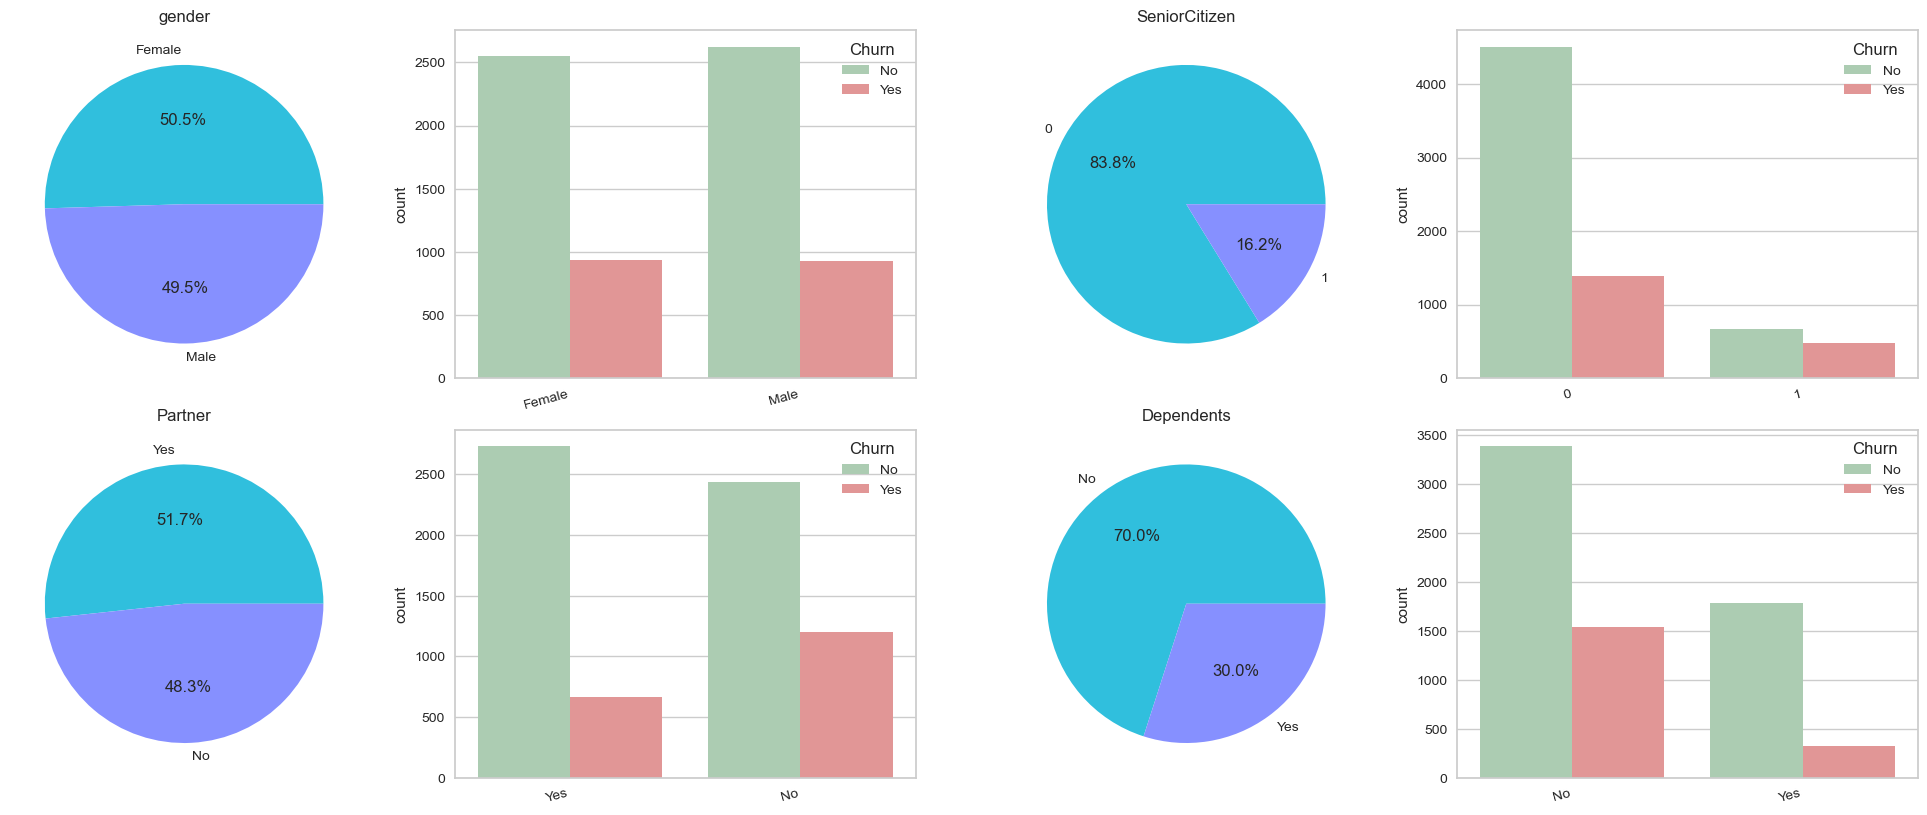

In [18]:
plot_cat(0,4)

gender (пол) - из графика видно, что отток клиента не зависит от пола.

SeniorCitizen (пенсионер) - пенсионеры составляют 16.2% от общего числа клиентов, большая часть из них перестала пользоваться услугами компании.

Partner (наличие партнера) - клиенты, у которых нет партнера в большей степени склонны к расторжению договора.

Dependents (иждивенцы) - высок отток среди клиентов, у которых нет иждивенцев.

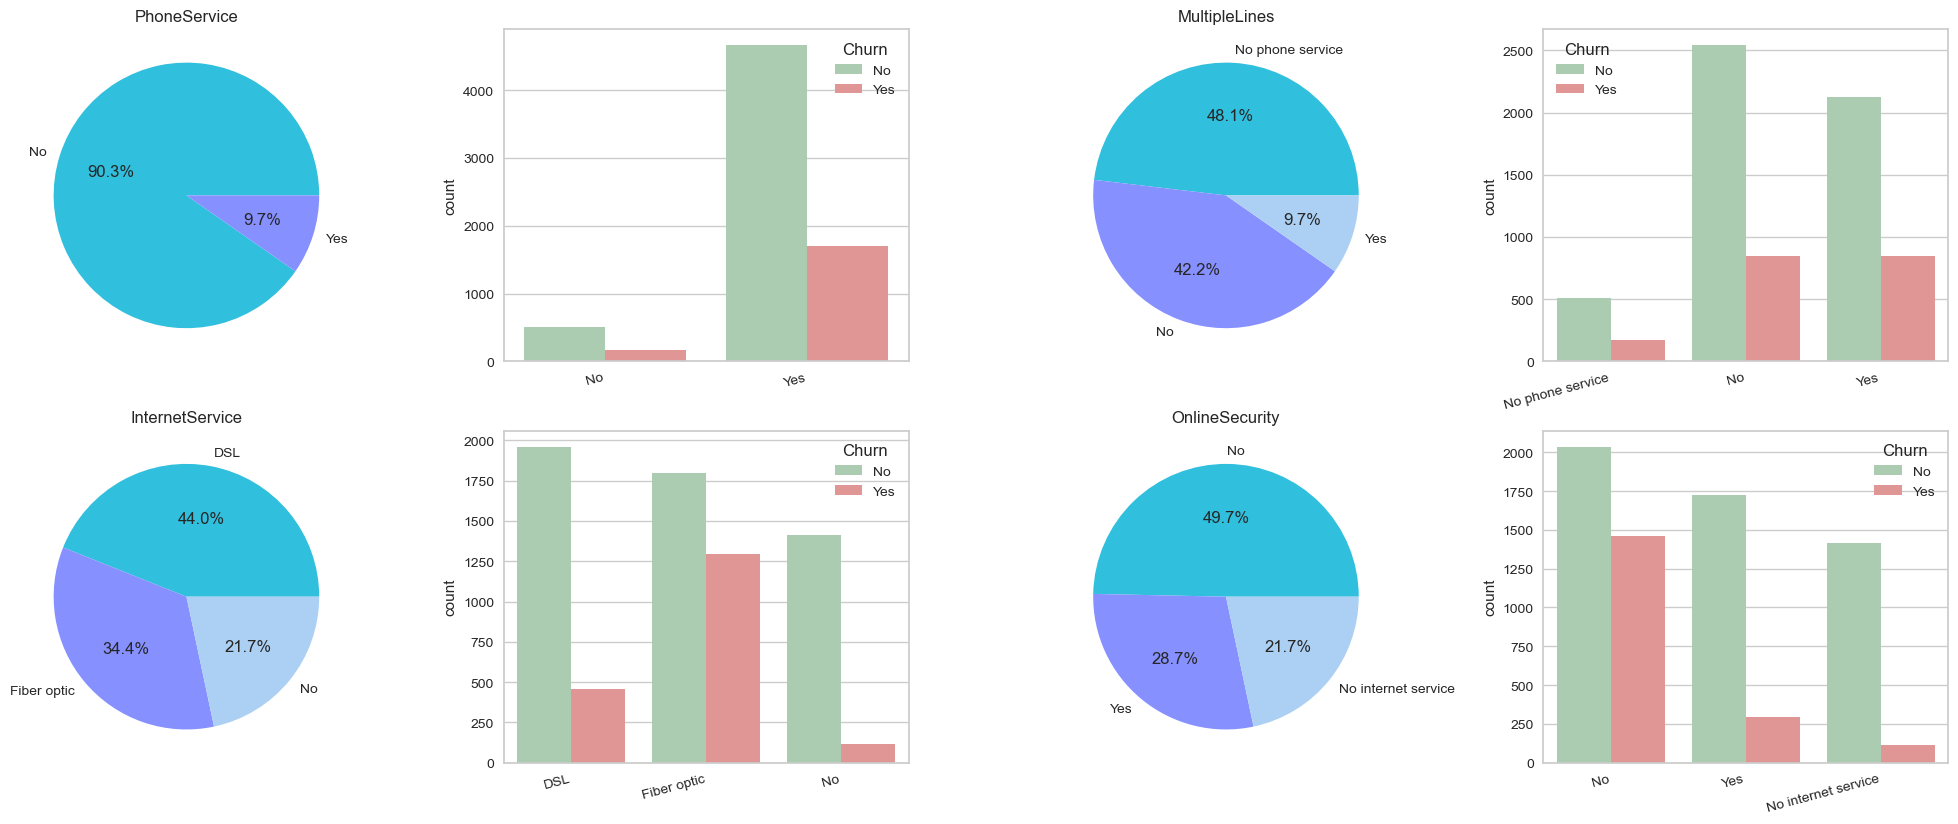

In [19]:
plot_cat(4,8)

PhoneService (наличие телефонной связи у клиента) - из графика видно, что из группы клиентов, у которых нет телефонной связи, ушло меньше человек, чем из группы клиентов, использующих данную услугу.

MultipleLines (наличие нескольких телефонных линий) - наличие или отсутствие нескольких телефонных линий не влияет на количество ушедших клиентов.

InternetService (интернет - провайдер клиента) - большая часть клиентов, которые пользовались провайдером Fiber Optic прекратили пользоваться услугами компании.

OnlineSecurity - (наличие онлайн безопасности) - наличие онлайн безопасности сильно влияет на отток клиентов.

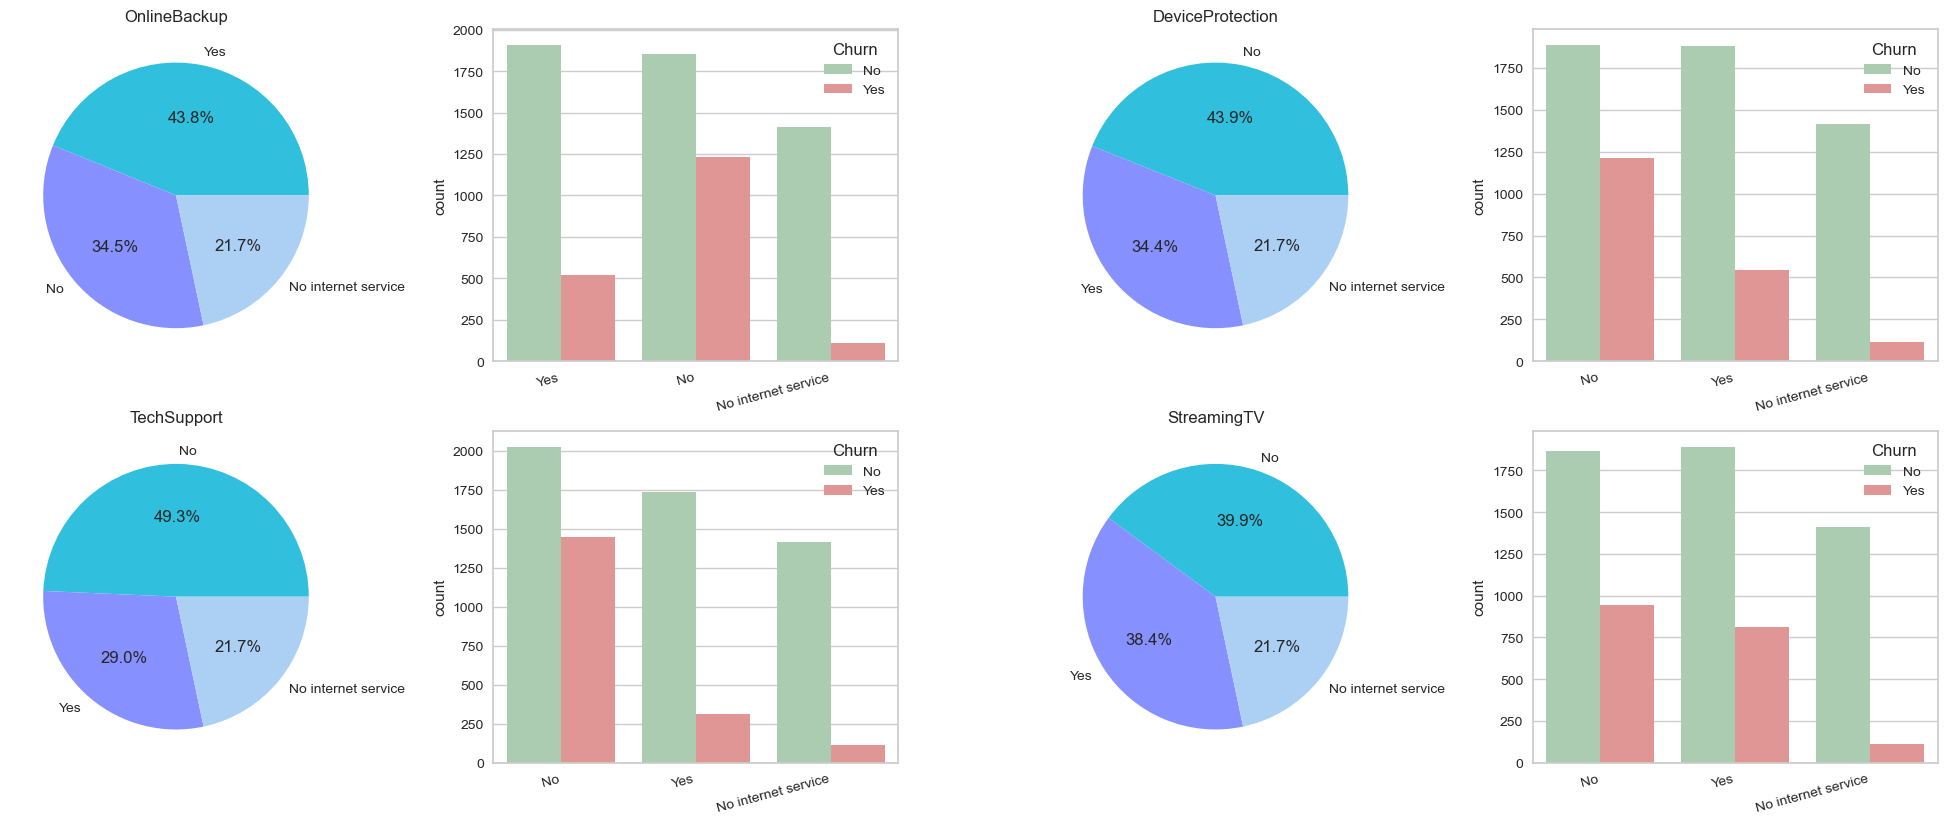

In [20]:
plot_cat(8,12)

OnlineBackup (наличие резервоного копирования) - большая часть клиентов, которые ушли, не пользовались резервным копированием.

DeviceProtection (наличие у клиента защиты устройств) - наличие защиты устройств сильно влияет на отток клиентов.

TechSupport (наличие технической поддержки) - клиенты, которые не пользовались технической поддержкой, с большей вероятностью расторгнут договор.

StreamingTV (пользуется ли клиент телевидением) - телевидение практически не влияет на отток клиентов.

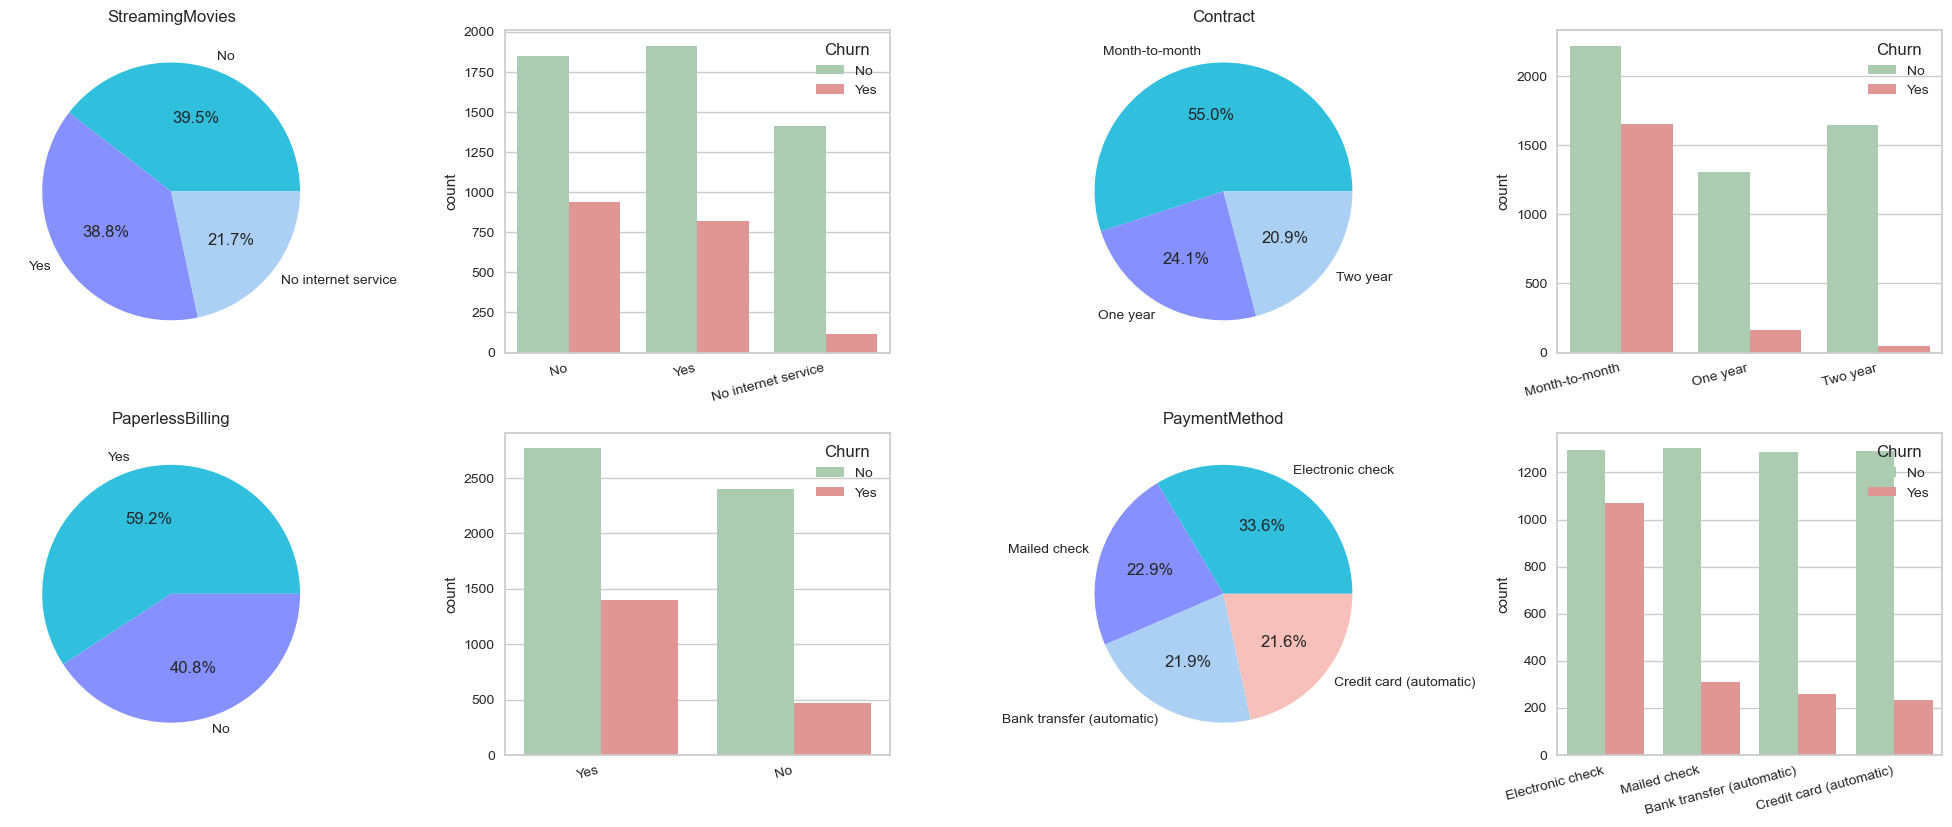

In [21]:
plot_cat(12,16)

StreamingMovies (наличие потокового воспроизведения фильмов) - наличие услуги потокового воспроизведения фильмов не сильно влияет на отток клиентов.

Contract (срок действия договора) - клиенты, заключившие договор на месяц, с большей вероятностью не продлят его, предположительно, это связано с тем, что клиент пробует услуги разных телефонных компаний.

PaperlessBilling (наличие электронного счета) - большое количество клиентов, пользующихся электроннным счетом, расторгли договор, возможно, это связано с ошибками при онлайн оплате.

PaymentMethod (способ оплаты) - клиенты, использующие электронную оплату, расторгли договор, это говорит о том, что в компании есть проблемы с данным способом оплаты.

## Числовые признаки

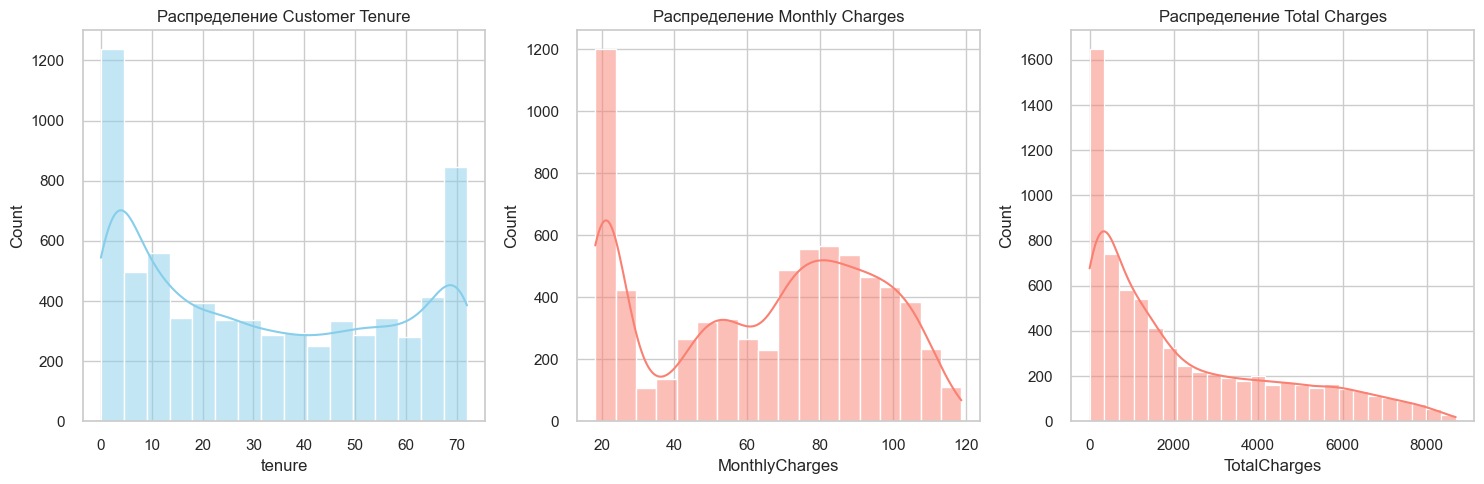

In [22]:
sns.set(style="whitegrid")

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data['tenure'], kde=True, color='skyblue')
plt.title('Распределение Customer Tenure')

plt.subplot(1, 3, 2)
sns.histplot(data['MonthlyCharges'], kde=True, color='salmon')
plt.title('Распределение Monthly Charges')

plt.subplot(1, 3, 3)
sns.histplot(data['TotalCharges'], kde=True, color='salmon')
plt.title('Распределение Total Charges')

plt.tight_layout()
plt.show()

Распределение Customer Tenure (срок пользования клиентом услугами компании) -  достаточно большое количество клиентов расторгает договор спустя несколько месяцев после заключения, но также у компании досаточно большое количество лояльных клиентов, которые уже долгие годы пользуются ее услугами.

Распределение Monthly Charges (месячный платеж) - из графика видно, что большая часть клиентов пользуется базовыми тарифами, также можно заметить небольшой скачок около значений 70-80, это говорит о том, что у компании все же есть доля клиентов, которые выбирают тарифы более высокого уровня.

Распределение Total Charges (общая сумма) - данный график показывает, что значительная доля клиентов предпочитает не переплачивать за дополнительные услуги и пользуется базовыми тарифами.

Признаки, не влияющие на отток клиентов:

- gender (пол)

- MultipleLines(наличие нескольких телефонных линий)

- StreamingTV (пользуется ли клиент телевидением)


## Баланс классов

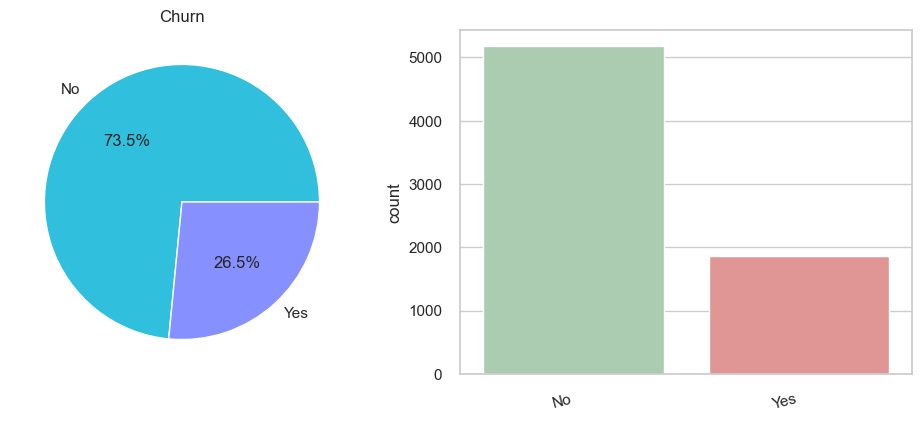

In [23]:
plot_cat(16,19)

Количество клиентов, которые продолжили пользоваться услугами компании, намного больше, чем количество клиентов, которые расторгли договор. Из-за этого присутствует дисбаланс классов.

## Влияние признаков на целевую переменную

На предыдущем этапе работы была выдвинута гипотеза о том, что:

- gender (пол)

- MultipleLines(наличие нескольких телефонных линий)

- StreamingTV (пользуется ли клиент телевидением)

не влияют на отток клиентов, проверим данную гипотезу с помощью матрицы корреляций признаков с целевой переменной. 


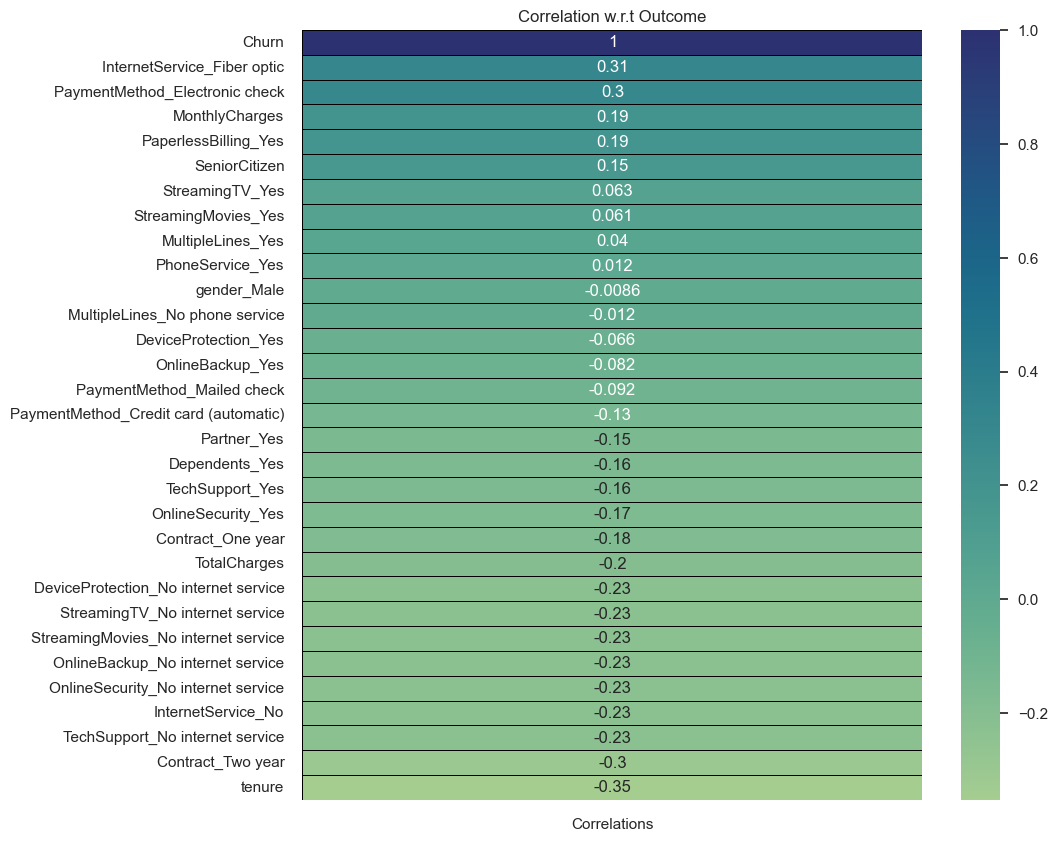

In [24]:
corr = data_enc.corrwith(data_enc['Churn']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (10,10))
sns.heatmap(corr,annot = True,cmap = 'crest',linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Outcome');

Отбросим признаки с корреляцией от -0.1 до 0.1

In [65]:
data_clean = data_enc.drop(['StreamingTV_Yes',
                            'StreamingMovies_Yes',
                            'MultipleLines_Yes',
                            'PhoneService_Yes',
                            'gender_Male', 
                            'MultipleLines_No phone service',
                            'OnlineBackup_Yes',
                            'PaymentMethod_Mailed check'], axis = 1)

In [26]:
data_clean.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingMovies_No internet service,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,Churn
0,0,1,29.85,29.85,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,2,53.85,108.15,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,1


Действительно, пол, наличие нескольких телефонных линий и телевидение не влияют на отток клиентов. Также, были удалены следующие признаки: наличие потокового воспроизведения фильмов(Да), наличие телефонной связи(Да), резервное копирование(Да), способ оплаты(e-mail).

### Дисбаланс классов.


Избавимся от дисбаланса классов, чтобы улучшить качество моделей и избежать ошибок в предсказании.

In [27]:
over = SMOTE(sampling_strategy = 1)

features = data_clean.iloc[:,:18].values
target = data_clean.iloc[:,18].values

features, target = over.fit_resample(features, target)
Counter(target)

Counter({0: 5348, 1: 5348})

# 5. Выбор модели.

Делим выборку на тестовую и тренировочную.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

Для решения данной задачи обучим следующие алгоритмы:

- Logistic Regression

- Random Forest Classifier 

- Decision Tree Classifier

- KNeighbors Classifier

- SVC

- GaussianNB

- MLP Classifier



Для оценки моделей используем следующие метрики:

- accuracy_score - это метрика оценки качества модели в задачах классификации, которая измеряет долю правильно классифицированных объектов относительно общего числа объектов.

- f1_score - это гармоническое среднее между Precision и Recall, которое представляет собой компромисс между ними.

- precision_score - это метрика оценки качества модели в задачах классификации, которая измеряет долю правильно предсказанных положительных классов относительно всех объектов, которые модель предсказала как положительные.

- recall_score - это метрика оценки качества модели в задачах классификации, которая измеряет долю правильно предсказанных положительных классов относительно всех истинных положительных классов.

In [30]:
metrics = pd.DataFrame({'metrics': ['accuracy', 'f1', 
                                 'precision', 'recall', ]})

### Logistic Regression

In [31]:
log_reg = LogisticRegression(max_iter = 10000).fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

In [32]:
metrics.insert(1,'LogisticRegression', [accuracy_score(y_test, y_pred_log_reg),
                f1_score(y_test, y_pred_log_reg),
                precision_score(y_test, y_pred_log_reg),
                recall_score(y_test, y_pred_log_reg)])

### Random Forest Classifier

In [33]:
rand_forest = RandomForestClassifier().fit(X_train, y_train)
y_pred_rand_forest = rand_forest.predict(X_test)

In [34]:
metrics.insert(2,'Random Forest Classifier', [accuracy_score(y_test, y_pred_rand_forest),
                f1_score(y_test, y_pred_rand_forest),
                precision_score(y_test, y_pred_rand_forest),
                recall_score(y_test, y_pred_rand_forest)])

### Decision Tree Classifier


In [35]:
des_tree = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_des_tree = des_tree.predict(X_test)

In [36]:
metrics.insert(3,'Decision Tree Classifier', [accuracy_score(y_test, y_pred_des_tree),
                f1_score(y_test, y_pred_des_tree),
                precision_score(y_test, y_pred_des_tree),
                recall_score(y_test, y_pred_des_tree)])

### KNeighbors Classifier

In [37]:
neigh = KNeighborsClassifier().fit(X_train, y_train)
y_pred_neigh = neigh.predict(X_test)

In [38]:
metrics.insert(4,'KNeighbors Classifier', [accuracy_score(y_test, y_pred_neigh),
                f1_score(y_test, y_pred_neigh),
                precision_score(y_test, y_pred_neigh),
                recall_score(y_test, y_pred_neigh)])

### SVC

In [39]:
svc = SVC().fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

In [40]:
metrics.insert(5,'SVC', [accuracy_score(y_test, y_pred_svc),
                f1_score(y_test, y_pred_svc),
                precision_score(y_test, y_pred_svc),
                recall_score(y_test, y_pred_svc)])

### GaussianNB

In [41]:
gaussian_nb = GaussianNB().fit(X_train, y_train)
y_pred_gaussian_nb = gaussian_nb.predict(X_test)

In [42]:
metrics.insert(6,'GaussianNB', [accuracy_score(y_test, y_pred_gaussian_nb),
                f1_score(y_test, y_pred_gaussian_nb),
                precision_score(y_test, y_pred_gaussian_nb),
                recall_score(y_test, y_pred_gaussian_nb)])

### MLP Classifier

In [43]:
mlp_class = MLPClassifier().fit(X_train, y_train)
y_pred_mlp_class = mlp_class.predict(X_test)

In [44]:
metrics.insert(7,'MLP Classifier', [accuracy_score(y_test, y_pred_mlp_class),
                f1_score(y_test, y_pred_mlp_class),
                precision_score(y_test, y_pred_mlp_class),
                recall_score(y_test, y_pred_mlp_class)])

In [45]:
metrics

,metrics,LogisticRegression,Random Forest Classifier,Decision Tree Classifier,KNeighbors Classifier,SVC,GaussianNB,MLP Classifier
0,accuracy,0.934112,0.963084,0.945327,0.855607,0.764953,0.897664,0.919159
1,f1,0.934571,0.963307,0.945302,0.861621,0.754275,0.900500,0.921399
2,precision,0.929825,0.959297,0.947516,0.828596,0.791795,0.877768,0.898140
3,recall,0.939366,0.967351,0.943097,0.897388,0.720149,0.924440,0.945896


Самые лучшие результаты показала модель Random Forest Classifier.

# 6. Усовершенствование модели.

## Кривая обучения

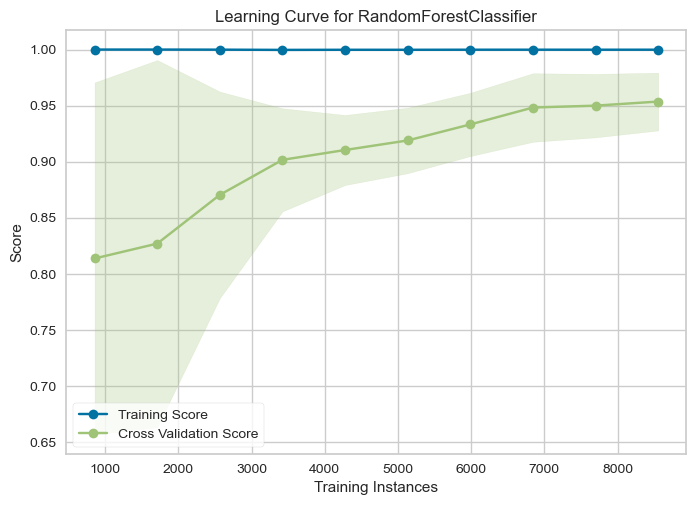

In [38]:
visualizer = LearningCurve(
    RandomForestClassifier(), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(features, target) .show() 

Из графика видно, что модель обучается хорошо, переобучение и недообучение отсутствуют.

## Поиск оптимальных гиперпараметров.

In [54]:
param_grid = { 
    'n_estimators': [100, 200, 300, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [8, 12],
    'criterion' :['gini', 'entropy']
}

In [55]:
CV_rfc = GridSearchCV(estimator=rand_forest, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [8, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 500]})

In [56]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 500}

In [60]:
start = time.time()
rand_forest_2 = RandomForestClassifier(criterion = 'gini', 
                                       max_depth = 8, 
                                       max_features = 'sqrt',
                                       n_estimators = 500).fit(X_train, y_train)
end = time.time()
y_pred_rand_forest_2 = rand_forest_2.predict(X_test)
learning_time = end - start
print(round(learning_time, 2))

1.88


In [61]:
metrics_rf = pd.DataFrame({'metrics': ['accuracy', 'f1', 
                                 'precision', 'recall']})
metrics_rf.insert(1,'Random Forest Classifier', [accuracy_score(y_test, y_pred_rand_forest_2),
                f1_score(y_test, y_pred_rand_forest_2),
                precision_score(y_test, y_pred_rand_forest_2),
                recall_score(y_test, y_pred_rand_forest_2)])

In [62]:
metrics_rf

,metrics,Random Forest Classifier
0,accuracy,0.957477
1,f1,0.957733
2,precision,0.953747
3,recall,0.961754


После подбора оптимальных гиперпараметров, модель показывает примерно те же результаты, что и до.

## Кросс - валидация.

In [63]:
kf = KFold(n_splits = 3,shuffle=True, random_state=15)

In [64]:
cv_results = cross_val_score(rand_forest_2,features,                    
                             target, cv = kf,                
                             scoring = 'accuracy',  n_jobs=-1)              

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())
print("Дисперсия по кросс-валидации: ", cv_results.std())

Кросс-валидация:  [0.9551318  0.95343619 0.95680224]
Среднее по кросс-валидации:  0.9551234098363407
Дисперсия по кросс-валидации:  0.0013742006015831797


Время обучения модели 1.88 секунд. Относительно общего числа объектов, модель предсказывает верно 95.5%, что является хорошим результатом.

# 7. Выводы и результаты исследования.

В ходе выполнения курсовой работы был проведен предварительный анализ данных и построение признаков в задачах предсказания оттока клиентов. Были рассмотрены различные методы анализа данных, включая визуализацию, статистический анализ и машинное обучение. 

На основе проведенного анализа были выделены ключевые признаки, которые оказывают наибольшее влияние на вероятность оттока клиентов. Были построены модели предсказания оттока с использованием различных алгоритмов машинного обучения, таких как Logistic Regression, Random Forest Classifier, Decision Tree Classifier, KNeighbors Classifier, SVC, GaussianNB, MLP Classifier. Лучшие результаты показали модели Random Forest Classifier и Decision Tree Classifier, худшие - SVC.

Таким образом, результаты исследования показали, что предобработка данных является важным этапом при построении модели и позволяет получить наиболее точное предсказание оттока клиентов. 